<a href="https://colab.research.google.com/github/HiveCase/MachineLearningPractice/blob/main/OPPE2/Mock_OPPE2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('T124OPPE2_ModelBuilding_V1.csv')
df.head()

,Gender,Age,HasTension,AnyHeartDisease,NeverMarried,Occupation_Govt_job,Occupation_Never_worked,Occupation_Private,Occupation_Self-employed,Occupation_children,LivesIn,GlucoseLevel,BMI,SmokingStatus_formerly smoked,SmokingStatus_never smoked,SmokingStatus_smokes,HeartAttack
0,0.0,0.433901,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.203263,0.284421,0.0,1.0,0.0,0
1,1.0,-1.840435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.386014,-1.186687,0.0,1.0,0.0,0
2,1.0,-1.160260,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.326807,0.065045,0.0,1.0,0.0,0
3,1.0,-0.806002,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.182284,0.929643,0.0,1.0,0.0,0
4,0.0,0.743876,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.200466,-0.412420,0.0,0.0,1.0,1


In [4]:
df.shape

(4000, 17)

In [5]:
X = df.drop(columns=['HeartAttack'])
y= df['HeartAttack']

In [6]:
X.head()

,Gender,Age,HasTension,AnyHeartDisease,NeverMarried,Occupation_Govt_job,Occupation_Never_worked,Occupation_Private,Occupation_Self-employed,Occupation_children,LivesIn,GlucoseLevel,BMI,SmokingStatus_formerly smoked,SmokingStatus_never smoked,SmokingStatus_smokes
0,0.0,0.433901,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.203263,0.284421,0.0,1.0,0.0
1,1.0,-1.840435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.386014,-1.186687,0.0,1.0,0.0
2,1.0,-1.160260,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.326807,0.065045,0.0,1.0,0.0
3,1.0,-0.806002,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.182284,0.929643,0.0,1.0,0.0
4,0.0,0.743876,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.200466,-0.412420,0.0,0.0,1.0


In [7]:
X_train, X_test = X.iloc[:(int(0.7*(len(X))))], X.iloc[(int(0.7*(len(X)))):]

In [10]:
y_train, y_test = y.iloc[:int(0.7*(len(y)))], y.iloc[int(0.7*len(y)):]

### Q2:
Instructions (Q2-Q3)
Instantiate a perceptron classifier that with following parameters:

	random_state = 1729
	learning rate = 1
	Train for appropriate number of iterations
	Do not shuffle the dataset for each iteration.
	Include the intercept (bias) term.
	Use 10% of the data for validation fraction.
	Do not apply regularization.
	Set warm start to true.
Hint: one iteration of training indicates going over each sample exactly once.

Train the classifier on the training data.


Train the perceptron classifier for 5 iterations. What is value of bias (intercept) after 5th iteration?

In [13]:
from sklearn.linear_model import Perceptron


In [14]:
per = Perceptron(random_state = 1729, max_iter=5, shuffle=False, fit_intercept=True, validation_fraction=0.1, warm_start=True)
per.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Perceptron(max_iter=5, random_state=1729, shuffle=False, warm_start=True)

In [15]:
per.intercept_

array([-3.])

### Q3: In continuation of the previous question, compute precision accurate upto 2 decimal places on training data for positive class (i.e. class value 1), after 5 iterations.

[Hint: Use estimator trained from the previous question]


In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_train, per.predict(X_train)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      2664
           1       0.67      0.01      0.03       136

    accuracy                           0.95      2800
   macro avg       0.81      0.51      0.50      2800
weighted avg       0.94      0.95      0.93      2800



### Q4: Train (on training data only) logistic regression using SGDClassifier. Use the following parameters:

	Choose appropriate loss value to obtain logistic regression
	penalty='l2',
	eta0=0.001,
	alpha=0,
	learning_rate='constant'
	random_state=1729.
	warm_start = True

Train the classifier for 5 iterations and note the value of the loss in each iteration. What will be the loss value after second iteration? Answer upto three decimal places.

Note: Set the remaining parameters, if any, accordingly to be able to get the loss value after second iteration. Also note that the classifier has to be trained for 5 iterations.

In [19]:
from sklearn.linear_model import SGDClassifier

In [38]:
sgd = SGDClassifier(loss='log_loss',penalty='l2', eta0=0.001, alpha=0, learning_rate='constant', random_state=1729, warm_start = True,max_iter=1)

In [39]:
from sklearn.metrics import log_loss

In [40]:
for i in range(5):
  sgd.fit(X_train,y_train)
  print(log_loss(y_train,sgd.predict_proba(X_train)))

0.2529904609012919
0.20828682141739835
0.19406901833322654
0.18699850891012404
0.18255077295024025


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic

###Q5: Use GridSearchCV with SGDClassifier. Following are the classifier's parameters:

	loss = 'log_loss'
	learning_rate = 'constant'
	random_state = 1729

Following are parameters to examine:

	alpha = [0.0001, 0.0005, 0.001, 0.005]
	eta0 = [0.01, 0.05, 0.1, 0.5]

What are the best values of alpha and eta0 respectively?
 - [ ] 0.0001, 0.01
 - [ ] 0.001, 0.01
 - [ ] 0.0001, 0.5
 - [ ] 0.0005, 0.01
 - [ ] 0.005, 0.5
 - [ ] 0.05, 0.1

In [42]:
from sklearn.model_selection import GridSearchCV

In [41]:
param_grid = {
    'alpha' : [0.0001, 0.0005, 0.001, 0.005],
    'eta0'  : [0.01, 0.05, 0.1, 0.5]
}

In [44]:
gcv = GridSearchCV(SGDClassifier(loss = 'log_loss', learning_rate = 'constant', random_state = 1729), param_grid)


In [48]:
gcv.fit(X_train,y_train)

GridSearchCV(estimator=SGDClassifier(learning_rate='constant', loss='log_loss',
                                     random_state=1729),
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.005],
                         'eta0': [0.01, 0.05, 0.1, 0.5]})

In [50]:
gcv.best_params_

{'alpha': 0.0001, 'eta0': 0.01}

###Q6: Create a new estimator using SGDClassifier that uses the best parameters obtained in Gridsearch earlier ((learning rate to be constant, random_state to be '1729' and use appropriate loss for logistic regression)) and set the weight of class 0 to be 0.1 and the weight of class 1 to be 2. How many samples of class 1 from the test set are correctly predicted by this estimator?

47

46

55

40

41

None of these

In [51]:
?SGDClassifier

In [52]:
sg = SGDClassifier(random_state=1729, learning_rate='constant', loss='log_loss',alpha=0.0001,eta0=0.01, class_weight={0:0.1,1:2})

In [53]:
sg.fit(X_train, y_train)

SGDClassifier(class_weight={0: 0.1, 1: 2}, eta0=0.01, learning_rate='constant',
              loss='log_loss', random_state=1729)

In [55]:
print(classification_report(y_test, sg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.74      0.84      1142
           1       0.14      0.81      0.23        58

    accuracy                           0.74      1200
   macro avg       0.56      0.77      0.54      1200
weighted avg       0.95      0.74      0.82      1200



In [56]:
from sklearn.metrics import ConfusionMatrixDisplay

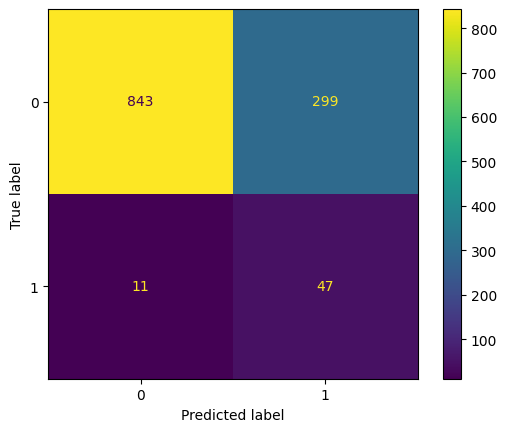

In [58]:
ConfusionMatrixDisplay.from_estimator(sg, X_test, y_test)

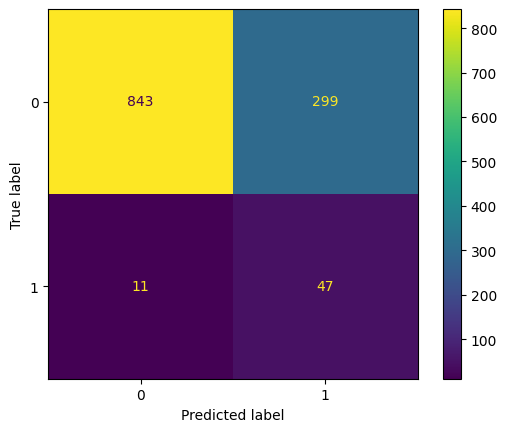

In [60]:
ConfusionMatrixDisplay.from_predictions(y_test,sg.predict(X_test))

### Q7: Fit an SVM classifier with following parameters:

	kernel='rbf'
	decision_function_shape='ovr'
	random_state=1729
	C=1

Train the model on training data, and print the confusion matrix on test data.

[[1142 0] [ 58 0]]

[[1141 0] [ 59 0]]

[[1139 0] [ 61 0]]

[[1150 0] [ 50 0]]

[[1000 0] [ 200 0]]

In [62]:
from sklearn.svm import SVC

In [63]:
svc = SVC(kernel='rbf', decision_function_shape='ovr', random_state=1729, C=1)
svc.fit(X_train,y_train)

SVC(C=1, random_state=1729)

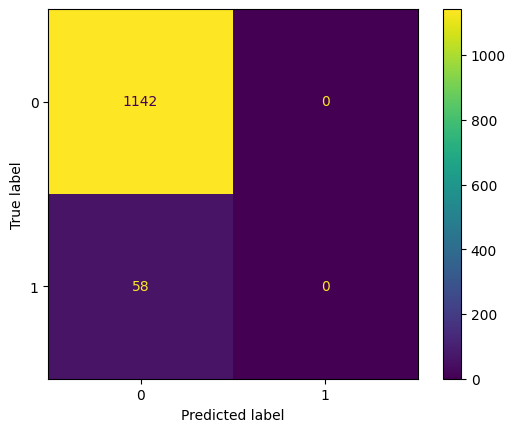

In [64]:
ConfusionMatrixDisplay.from_estimator(svc, X_test, y_test)

###Q8: Train a Decision Tree Classifier with the following properties:

	criterion = 'entropy',
	splitter = 'random',
	min_samples_split = 4,
	min_impurity_decrease = 0.0001,
	random_state = 1729

What is the resultant depth of the tree?

18

20

21

24

26

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
dc = DecisionTreeClassifier(criterion = 'entropy', splitter = 'random', min_samples_split = 4, min_impurity_decrease = 0.0001, random_state = 1729)
dc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.0001,
                       min_samples_split=4, random_state=1729,
                       splitter='random')

In [71]:
dc.get_depth()

20

### Q9: How many nodes are there in the tree?

495

515

491

589

571

In [75]:
dc.tree_.node_count

515

###Q10:
What is the value of entropy at the left child of root?

In [80]:
tree = dc.tree_

In [82]:
left_child = tree.children_left[0]

In [83]:
tree.impurity[left_child]

np.float64(0.024564134553940277)